<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/polynomial_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [4]:
a=np.random.randn(200,1)

In [5]:
a[0]

array([1.82978508])

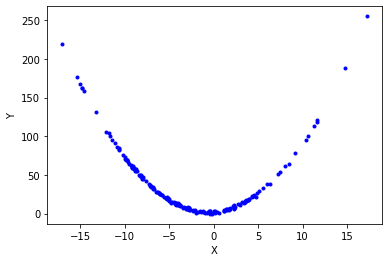

In [9]:
X=6*np.random.randn(200,1)-3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
linearR=LinearRegression()
linearR.fit(x_train,y_train)
y_pred=linearR.predict(x_test)
print(r2_score(y_test,y_pred))

0.12991712528610988


In [14]:
ad_r2score=1-(1-r2_score(y_test,y_pred))*((len(X)+len(y))-1)/((len(X)+len(y))-len(X)-1)

In [15]:
ad_r2score

-0.7445380251801113

In [16]:
poly=PolynomialFeatures(degree=2)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred=lr.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.9993382203056109


In [17]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8951178  0.79772211]]
[2.18649123]


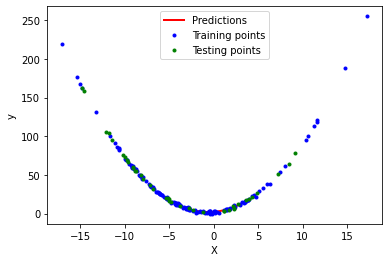

In [25]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label='Predictions')
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3,3,100).reshape(100,1)
    X_new_poly=poly.transform(X_new)
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_regression=Pipeline([
            ('poly_fetaures',polybig_features),
            ('std_scaler',std_scaler),
            ('lin_reg',lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig=polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,'r-',label='Degrees'+str(degree),linewidth=2)
    plt.plot()
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

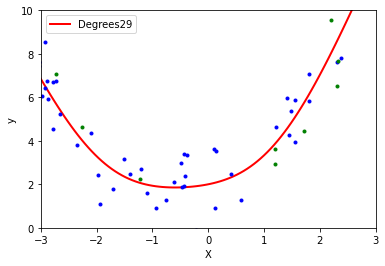

In [28]:
polynomial_regression(29)

In [29]:
x=7*np.random.randn(100,1) - 2.8
y=7*np.random.randn(100,1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [33]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [36]:
import plotly.graph_objects as go
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x,y=y,z=z))
fig.show()

In [37]:
X_multi=np.array([x,y]).reshape(100,2)
poly=PolynomialFeatures(degree=30)
X_multi_trans=poly.fit_transform(X_multi)
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powersn",poly.powers_)

Input 2
Ouput 496
Powersn [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [39]:
lr=LinearRegression()
lr.fit(X_multi_trans,z)
#X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)